In [2]:
# from tensorflow import keras
# from tensorflow.keras import layers
# from math import sqrt
# from numpy import concatenate
# from sklearn.preprocessing import MinMaxScaler
# from sklearn.preprocessing import LabelEncoder
# from sklearn.metrics import mean_squared_error
# from sklearn.metrics import mean_absolute_error
# from keras.layers import SimpleRNN
# from keras.layers.core import Dense, Dropout
# import matplotlib.pyplot as plt
# import pandas as pd
# from tensorflow.keras.optimizers import Adam
# from pandas import concat
# import numpy as np
# from helper import series_to_supervised, stage_series_to_supervised
# from pandas import read_csv

In [29]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

### Dataset

In [30]:
data1 = pd.read_csv('data/zeda/Merged_with_MeanGridRain.csv', index_col=0)
data1

,WS_S1,WS_S4,FLOW_S25A,GATE_S25A,HWS_S25A,TWS_S25A,FLOW_S25B,GATE_S25B,HWS_S25B,TWS_S25B,...,10040719,10040720,10040721,10040722,10040723,10040246,10040247,10040248,10040249,mean
Time,,,,,,,,,,,,,,,,,,,,,
1/1/10 00:00,0.33,0.34,0.0,0.0,2.17,0.49,0.00,0.0,2.84,0.58,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1/1/10 00:10,0.24,0.24,0.0,0.0,2.17,0.49,0.00,0.0,2.84,0.46,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1/1/10 00:20,0.15,0.12,0.0,0.0,2.17,0.40,0.00,0.0,2.84,0.34,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1/1/10 00:30,0.03,0.02,0.0,0.0,2.17,0.30,0.00,0.0,2.84,0.24,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1/1/10 00:40,-0.05,-0.06,0.0,0.0,2.17,0.20,0.00,0.0,2.84,0.15,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12/30/20 23:10,1.59,1.47,0.0,0.0,1.92,1.58,307.56,0.0,2.52,1.69,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
12/30/20 23:20,1.50,1.40,0.0,0.0,1.93,1.54,325.26,0.0,2.50,1.59,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
12/30/20 23:30,1.43,1.33,0.0,0.0,1.92,1.44,339.04,0.0,2.50,1.51,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [49]:
data1.to_csv('./data/zeda/Merged_all')

In [31]:
data1.describe()

,WS_S1,WS_S4,FLOW_S25A,GATE_S25A,HWS_S25A,TWS_S25A,FLOW_S25B,GATE_S25B,HWS_S25B,TWS_S25B,...,10040719,10040720,10040721,10040722,10040723,10040246,10040247,10040248,10040249,mean
count,578448.000000,578448.000000,577838.000000,578448.000000,577985.000000,578448.000000,578445.000000,578448.000000,578448.000000,578448.000000,...,578448.000000,578448.000000,578448.000000,578448.000000,578448.000000,578448.000000,578448.000000,578448.000000,578448.000000,578448.000000
mean,1.090975,1.094573,11.564133,0.281586,2.012253,1.209865,178.540635,0.915648,2.463058,1.238249,...,0.001598,0.001536,0.001470,0.001433,0.001422,0.001422,0.001454,0.001439,0.001507,0.001602
std,0.909275,0.887052,39.242065,0.923374,0.296181,0.889058,321.129812,2.188273,0.528319,0.892633,...,0.019146,0.018736,0.018364,0.017607,0.017318,0.017419,0.018095,0.017571,0.018397,0.010961
min,-1.200000,-1.340000,-423.320000,-0.060000,-0.010000,-1.150000,-1088.330000,0.000000,0.080000,-1.550000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.380000,0.400000,0.000000,0.000000,1.900000,0.510000,0.000000,0.000000,2.210000,0.560000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1.120000,1.110000,0.000000,0.000000,2.040000,1.240000,0.000000,0.000000,2.670000,1.280000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.780000,1.780000,0.000000,0.000000,2.170000,1.890000,306.960000,0.000000,2.860000,1.910000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,5.640000,5.510000,456.980000,7.850000,5.500000,5.550000,2519.870000,15.060000,5.680000,5.770000,...,1.370000,1.250000,1.380000,1.330000,1.340000,1.290000,1.360000,1.270000,1.160000,0.506250


In [33]:
data1['mean'].value_counts()

0.000000    501343
0.000313     12728
0.000625      7217
0.000937      4961
0.001250      3878
             ...  
0.172500         1
0.175625         1
0.125000         1
0.268437         1
0.229063         1
Name: mean, Length: 758, dtype: int64

In [51]:
data1[data1['mean'] == 0]

,WS_S1,WS_S4,FLOW_S25A,GATE_S25A,HWS_S25A,TWS_S25A,FLOW_S25B,GATE_S25B,HWS_S25B,TWS_S25B,...,10040719,10040720,10040721,10040722,10040723,10040246,10040247,10040248,10040249,mean
Time,,,,,,,,,,,,,,,,,,,,,
1/1/10 00:00,0.33,0.34,0.0,0.0,2.17,0.49,0.00,0.0,2.84,0.58,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1/1/10 00:10,0.24,0.24,0.0,0.0,2.17,0.49,0.00,0.0,2.84,0.46,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1/1/10 00:20,0.15,0.12,0.0,0.0,2.17,0.40,0.00,0.0,2.84,0.34,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1/1/10 00:30,0.03,0.02,0.0,0.0,2.17,0.30,0.00,0.0,2.84,0.24,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1/1/10 00:40,-0.05,-0.06,0.0,0.0,2.17,0.20,0.00,0.0,2.84,0.15,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12/30/20 23:10,1.59,1.47,0.0,0.0,1.92,1.58,307.56,0.0,2.52,1.69,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
12/30/20 23:20,1.50,1.40,0.0,0.0,1.93,1.54,325.26,0.0,2.50,1.59,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
12/30/20 23:30,1.43,1.33,0.0,0.0,1.92,1.44,339.04,0.0,2.50,1.51,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [50]:
data1[data1['mean'] > 0]

,WS_S1,WS_S4,FLOW_S25A,GATE_S25A,HWS_S25A,TWS_S25A,FLOW_S25B,GATE_S25B,HWS_S25B,TWS_S25B,...,10040719,10040720,10040721,10040722,10040723,10040246,10040247,10040248,10040249,mean
Time,,,,,,,,,,,,,,,,,,,,,
1/1/10 15:20,-0.68,-0.56,0.0,0.0,2.18,-0.45,0.00,0.0,2.80,-0.55,...,0.00,0.00,0.00,0.01,0.01,0.00,0.00,0.03,0.01,0.005938
1/1/10 15:30,-0.72,-0.60,0.0,0.0,2.18,-0.49,0.00,0.0,2.87,-0.57,...,0.02,0.02,0.03,0.04,0.01,0.02,0.02,0.04,0.01,0.015312
1/1/10 15:40,-0.74,-0.60,0.0,0.0,2.17,-0.51,0.00,0.0,2.83,-0.56,...,0.02,0.02,0.03,0.04,0.01,0.02,0.02,0.04,0.01,0.015312
1/1/10 15:50,-0.75,-0.57,0.0,0.0,2.17,-0.53,0.00,0.0,2.85,-0.61,...,0.02,0.02,0.02,0.01,0.01,0.02,0.01,0.01,0.01,0.018437
1/1/10 16:00,-0.72,-0.59,0.0,0.0,2.17,-0.54,0.00,0.0,2.85,-0.58,...,0.01,0.01,0.01,0.01,0.01,0.01,0.01,0.01,0.01,0.011875
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12/28/20 04:30,1.05,1.00,0.0,0.0,1.94,1.05,385.08,0.0,2.37,1.09,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.000313
12/28/20 04:40,1.11,1.08,0.0,0.0,1.94,1.10,373.22,0.0,2.37,1.17,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.000313
12/30/20 00:30,0.39,0.27,0.0,0.0,1.92,0.37,466.33,0.0,2.39,0.50,...,0.00,0.00,0.00,0.01,0.00,0.00,0.00,0.00,0.00,0.000313


In [37]:
# dataset = read_csv('data/zeda/Merged_with_MeanGridRain.csv', index_col=0)
dataset = pd.read_csv('data/zeda/Merged.csv', index_col=0)
dataset = dataset[:578448]
dataset

,WS_S1,WS_S4,FLOW_S25A,GATE_S25A,HWS_S25A,TWS_S25A,FLOW_S25B,GATE_S25B,HWS_S25B,TWS_S25B,FLOW_S26,GATE_S26,HWS_S26,TWS_S26,PUMP_S26,mean
Time,,,,,,,,,,,,,,,,
1/1/10 00:00,0.33,0.34,0.0,0.0,2.17,0.49,0.00,0.0,2.84,0.58,0.00,0.0,2.78,0.505,0.0,0.0
1/1/10 00:10,0.24,0.24,0.0,0.0,2.17,0.49,0.00,0.0,2.84,0.46,0.00,0.0,2.78,0.400,0.0,0.0
1/1/10 00:20,0.15,0.12,0.0,0.0,2.17,0.40,0.00,0.0,2.84,0.34,0.00,0.0,2.78,0.290,0.0,0.0
1/1/10 00:30,0.03,0.02,0.0,0.0,2.17,0.30,0.00,0.0,2.84,0.24,0.00,0.0,2.78,0.200,0.0,0.0
1/1/10 00:40,-0.05,-0.06,0.0,0.0,2.17,0.20,0.00,0.0,2.84,0.15,0.00,0.0,2.78,0.080,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12/30/20 23:10,1.59,1.47,0.0,0.0,1.92,1.58,307.56,0.0,2.52,1.69,372.45,0.0,2.47,1.650,0.0,0.0
12/30/20 23:20,1.50,1.40,0.0,0.0,1.93,1.54,325.26,0.0,2.50,1.59,390.52,0.0,2.47,1.560,0.0,0.0
12/30/20 23:30,1.43,1.33,0.0,0.0,1.92,1.44,339.04,0.0,2.50,1.51,393.75,0.0,2.44,1.540,0.0,0.0


### Dataset Information

In [38]:
print(list(dataset.columns))

['WS_S1', 'WS_S4', 'FLOW_S25A', 'GATE_S25A', 'HWS_S25A', 'TWS_S25A', 'FLOW_S25B', 'GATE_S25B', 'HWS_S25B', 'TWS_S25B', 'FLOW_S26', 'GATE_S26', 'HWS_S26', 'TWS_S26', 'PUMP_S26', 'mean']


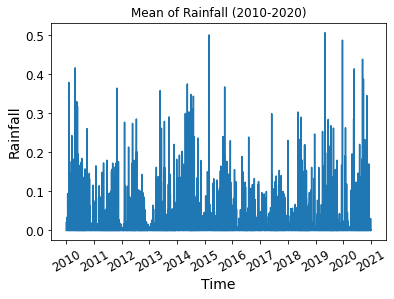

In [41]:
dates = ['2010', '2011', '2012', '2013', '2014', '2015', '2016', '2017', '2018', '2019', '2020', '2021'] 
# 2020: 2010-01-01-00:00
plt.plot(dataset.loc[:, 'mean'])
plt.xlabel('Time', fontsize='14')
plt.ylabel('Rainfall', fontsize='14')
plt.xticks(np.arange(0, 578593, 52599), dates, rotation=30, fontsize=12)
plt.yticks(fontsize=12)
plt.title('Mean of Rainfall (2010-2020)')
plt.savefig('./data/rain_mean.png', dpi=300)
plt.show()

In [42]:
count_0000_0001 = dataset.loc[dataset.loc[:, 'mean'] < 0.0001]
count_0001_0006 = dataset.loc[(dataset.loc[:, 'mean'] >= 0.0001) & (dataset.loc[:, 'mean'] < 0.0006)]
count_0006_0013 = dataset.loc[(dataset.loc[:, 'mean'] >= 0.0006) & (dataset.loc[:, 'mean'] < 0.0013)]
count_0013_0200 = dataset.loc[(dataset.loc[:, 'mean'] >= 0.0013) & (dataset.loc[:, 'mean'] < 0.002)]  # 0.0013 - 0.02


count_0200_0400 = dataset.loc[(dataset.loc[:, 'mean'] >= 0.02) & (dataset.loc[:, 'mean'] < 0.04)]  # 0.02 - 0.04
count_0400_0600 = dataset.loc[(dataset.loc[:, 'mean'] >= 0.04) & (dataset.loc[:, 'mean'] < 0.06)]  # 0.04 - 0.06 
count_0600_0800 = dataset.loc[(dataset.loc[:, 'mean'] >= 0.06) & (dataset.loc[:, 'mean'] < 0.08)]  # 0.06 - 0.08 
count_0800_0100 = dataset.loc[(dataset.loc[:, 'mean'] >= 0.08) & (dataset.loc[:, 'mean'] < 0.10)]  # 0.08 - 0.10 


count_1000_2000 = dataset.loc[(dataset.loc[:, 'mean'] >= 0.10) & (dataset.loc[:, 'mean'] < 0.20)]  # 0.10 - 0.20
count_2000_3000 = dataset.loc[(dataset.loc[:, 'mean'] >= 0.20) & (dataset.loc[:, 'mean'] < 0.30)]  # 0.20 - 0.30
count_3000_4000 = dataset.loc[(dataset.loc[:, 'mean'] >= 0.30) & (dataset.loc[:, 'mean'] < 0.40)]  # 0.30 - 0.40
count_4000_ = dataset.loc[dataset.loc[:, 'mean'] >= 0.40]                                          # >= 0.4

In [43]:
print("<=0.0001: ", len(count_0000_0001))
print("0.0001 - 0.0006: ", len(count_0006_0013))
print("0.0006 - 0.0013: ", len(count_0006_0013))
print("0.0013 - 0.020: ", len(count_0013_0200))

print("0.02 - 0.04: ", len(count_0002_0004))
print("0.04 - 0.06: ", len(count_0004_0006))
print("0.06 - 0.08: ", len(count_0006_0008))
print("0.08 - 0.10: ", len(count_0008_0010))

print("0.10 - 0.20: ", len(count_0010_0020))
print("0.20 - 0.30: ", len(count_0020_0030))
print("0.20 - 0.30: ", len(count_0030_0040))
print(">= 0.4: ", len(count_0040_0050))

<=0.0001:  501343
0.0001 - 0.0006:  16056
0.0006 - 0.0013:  16056
0.0013 - 0.020:  5479
0.02 - 0.04:  5977
0.04 - 0.06:  2471
0.06 - 0.08:  1231
0.08 - 0.10:  722
0.10 - 0.20:  1133
0.20 - 0.30:  229
0.20 - 0.30:  66
>= 0.4:  16


In [45]:
dataset['mean'].value_counts()
# no-rain: 501,343
# rain: 77,105

0.000000    501343
0.000313     12728
0.000625      7217
0.000937      4961
0.001250      3878
             ...  
0.172500         1
0.175625         1
0.125000         1
0.268437         1
0.229063         1
Name: mean, Length: 758, dtype: int64

<AxesSubplot:xlabel='mean', ylabel='Count'>

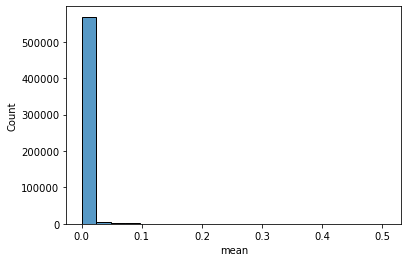

In [20]:
sns.histplot(dataset['mean'])

In [21]:
list(count_0040_0050.index)

['4/26/10 09:50',
 '2/28/15 11:50',
 '2/28/15 12:00',
 '2/28/15 12:10',
 '5/5/19 18:30',
 '5/5/19 18:40',
 '5/5/19 18:50',
 '5/5/19 19:00',
 '5/5/19 19:10',
 '12/23/19 03:30',
 '12/23/19 03:40',
 '12/23/19 03:50',
 '5/26/20 18:50',
 '9/13/20 02:20',
 '9/13/20 02:30',
 '9/13/20 02:40']

In [26]:
dataset.describe()

,WS_S1,WS_S4,FLOW_S25A,GATE_S25A,HWS_S25A,TWS_S25A,FLOW_S25B,GATE_S25B,HWS_S25B,TWS_S25B,FLOW_S26,GATE_S26,HWS_S26,TWS_S26,PUMP_S26,mean
count,578448.000000,578448.000000,577838.000000,578448.000000,577985.000000,578448.000000,578445.000000,578448.000000,578448.000000,578448.000000,578358.000000,578448.000000,578448.000000,578448.000000,578448.000000,578448.000000
mean,1.090975,1.094573,11.564133,0.281586,2.012253,1.209865,178.540635,0.915648,2.463058,1.238249,255.940100,1.038991,2.276512,1.144665,23.818090,0.001602
std,0.909275,0.887052,39.242065,0.923374,0.296181,0.889058,321.129812,2.188273,0.528319,0.892633,328.735386,1.983178,0.552432,1.121343,106.602674,0.010961
min,-1.200000,-1.340000,-423.320000,-0.060000,-0.010000,-1.150000,-1088.330000,0.000000,0.080000,-1.550000,-1107.480000,-0.260000,-0.280000,-7.520000,0.000000,0.000000
25%,0.380000,0.400000,0.000000,0.000000,1.900000,0.510000,0.000000,0.000000,2.210000,0.560000,0.000000,0.000000,1.960000,0.480000,0.000000,0.000000
50%,1.120000,1.110000,0.000000,0.000000,2.040000,1.240000,0.000000,0.000000,2.670000,1.280000,0.000000,0.000000,2.490000,1.230000,0.000000,0.000000
75%,1.780000,1.780000,0.000000,0.000000,2.170000,1.890000,306.960000,0.000000,2.860000,1.910000,506.197500,0.000000,2.690000,1.880000,0.000000,0.000000
max,5.640000,5.510000,456.980000,7.850000,5.500000,5.550000,2519.870000,15.060000,5.680000,5.770000,2158.400000,15.050000,5.530000,6.930000,648.930000,0.506250


In [25]:
data = dataset.loc[:, 'mean']
data.describe()

count    578448.000000
mean          0.001602
std           0.010961
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max           0.506250
Name: mean, dtype: float64

### N_out, N_in, K

In [22]:
# specify the number of lag hours
n_hours = 72
n_features = 15   # 1 rainfall + 2FG_S25A + 2FG_S25B + 2FG_S26 + 8ws + pump_S26
K = 12

### Pre-processing

#### Stage

In [23]:
# Pre-processing
# Stage --> 8 stages
stages = dataset[['WS_S1', 'WS_S4', 'TWS_S25A', 'TWS_S25B', 'TWS_S26', 'HWS_S25A', 'HWS_S25B', 'HWS_S26']]
print("stages.shape:", stages.shape)

stages_supervised = stage_series_to_supervised(stages, n_hours, K, 1)
print("stages_supervised.shape:", stages_supervised.shape)

stages.shape: (578448, 8)
stages_supervised.shape: (577817, 584)


In [26]:
stages_supervised

,var1(t-84),var2(t-84),var3(t-84),var4(t-84),var5(t-84),var6(t-84),var7(t-84),var8(t-84),var1(t-83),var2(t-83),...,var7(t-13),var8(t-13),var1(t),var2(t),var3(t),var4(t),var5(t),var6(t),var7(t),var8(t)
Time,,,,,,,,,,,,,,,,,,,,,
1/1/10 14:00,0.33,0.34,0.49,0.58,0.505,2.17,2.84,2.78,0.24,0.24,...,2.84,2.37,-0.19,-0.16,0.09,0.01,0.00,2.19,2.84,2.61
1/1/10 14:10,0.24,0.24,0.49,0.46,0.400,2.17,2.84,2.78,0.15,0.12,...,2.84,2.37,-0.29,-0.22,-0.01,-0.06,-0.10,2.18,2.83,2.64
1/1/10 14:20,0.15,0.12,0.40,0.34,0.290,2.17,2.84,2.78,0.03,0.02,...,2.84,2.35,-0.35,-0.29,-0.10,-0.19,-0.22,2.19,2.84,2.64
1/1/10 14:30,0.03,0.02,0.30,0.24,0.200,2.17,2.84,2.78,-0.05,-0.06,...,2.84,2.31,-0.44,-0.38,-0.16,-0.26,-0.31,2.19,2.86,2.66
1/1/10 14:40,-0.05,-0.06,0.20,0.15,0.080,2.17,2.84,2.78,-0.18,-0.19,...,2.85,2.41,-0.49,-0.44,-0.23,-0.32,-0.34,2.18,2.85,2.66
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12/30/20 23:10,2.23,2.19,2.22,2.30,2.300,1.88,2.49,2.56,2.22,2.17,...,2.49,2.56,1.59,1.47,1.58,1.69,1.65,1.92,2.52,2.47
12/30/20 23:20,2.22,2.17,2.27,2.32,2.310,1.88,2.49,2.56,2.24,2.17,...,2.51,2.56,1.50,1.40,1.54,1.59,1.56,1.93,2.50,2.47
12/30/20 23:30,2.24,2.17,2.26,2.36,2.310,1.88,2.51,2.56,2.24,2.17,...,2.51,2.56,1.43,1.33,1.44,1.51,1.54,1.92,2.50,2.44


#### Non-stage

In [25]:
# Non-Stage --> 7 = 1 rainfall + 2FG_S25A + 2FG_S25B + 'PUMP_S26'
non_stages = dataset[['FLOW_S25A', 'GATE_S25A', 'FLOW_S25B', 'GATE_S25B', 'FLOW_S26', 'GATE_S26', 'mean']]
print("non_stages.shape:", non_stages.shape)

non_stages_supervised = series_to_supervised(non_stages, n_hours, 1)
print("non_stages_supervised.shape:", non_stages_supervised.shape)

non_stages.shape: (578448, 7)
non_stages_supervised.shape: (576593, 511)


In [27]:
non_stages_supervised

,var1(t-72),var2(t-72),var3(t-72),var4(t-72),var5(t-72),var6(t-72),var7(t-72),var1(t-71),var2(t-71),var3(t-71),...,var5(t-1),var6(t-1),var7(t-1),var1(t),var2(t),var3(t),var4(t),var5(t),var6(t),var7(t)
Time,,,,,,,,,,,,,,,,,,,,,
1/1/10 12:00,0.0,0.0,0.00,0.0,0.00,0.0,0.0,0.0,0.0,0.00,...,431.65,0.0,0.0,0.0,0.0,0.00,0.0,441.35,0.0,0.0
1/1/10 12:10,0.0,0.0,0.00,0.0,0.00,0.0,0.0,0.0,0.0,0.00,...,441.35,0.0,0.0,0.0,0.0,0.00,0.0,456.44,0.0,0.0
1/1/10 12:20,0.0,0.0,0.00,0.0,0.00,0.0,0.0,0.0,0.0,0.00,...,456.44,0.0,0.0,0.0,0.0,0.00,0.0,471.05,0.0,0.0
1/1/10 12:30,0.0,0.0,0.00,0.0,0.00,0.0,0.0,0.0,0.0,0.00,...,471.05,0.0,0.0,0.0,0.0,0.00,0.0,481.72,0.0,0.0
1/1/10 12:40,0.0,0.0,0.00,0.0,0.00,0.0,0.0,0.0,0.0,0.00,...,481.72,0.0,0.0,0.0,0.0,0.00,0.0,326.25,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12/30/20 23:10,0.0,0.0,278.30,0.0,355.30,0.0,0.0,0.0,0.0,304.35,...,353.84,0.0,0.0,0.0,0.0,307.56,0.0,372.45,0.0,0.0
12/30/20 23:20,0.0,0.0,304.35,0.0,368.75,0.0,0.0,0.0,0.0,314.84,...,372.45,0.0,0.0,0.0,0.0,325.26,0.0,390.52,0.0,0.0
12/30/20 23:30,0.0,0.0,314.84,0.0,386.86,0.0,0.0,0.0,0.0,329.47,...,390.52,0.0,0.0,0.0,0.0,339.04,0.0,393.75,0.0,0.0


### Concatenation

In [28]:
non_stages.reset_index(drop=True, inplace=True)
non_stages_supervised.reset_index(drop=True, inplace=True)
stages_supervised.reset_index(drop=True, inplace=True)

all_data = concat([non_stages.iloc[0:len(stages_supervised), -1],    # add rainfall to measure heavy/medium/light
                   non_stages_supervised.iloc[0:len(stages_supervised), 0:-non_stages.shape[1]],
                   stages_supervised.iloc[:, :-3]],
                   axis=1)

In [30]:
# print("all_data", all_data)
print("all_data.shape:", all_data.shape)

all_data.shape: (577817, 1086)


### Train & Test set

In [31]:
all_data = all_data.values
n_train_hours = int(len(all_data)*0.8)
print("n_train_hours:", n_train_hours)


train = all_data[:n_train_hours, 1:]    # 0 column is the rainfall to measure heavy/medium/light
test = all_data[n_train_hours:, 1:]

n_train_hours: 462253


In [ ]:
# rain_trainset = pd.DataFrame(all_data[:n_train_hours, 0])
# rain_testset = pd.DataFrame(all_data[n_train_hours:, 0])
#
# data_00_15 = rain_testset.loc[rain_testset.iloc[:, 0] < 0.15]
# data_15_25 = rain_testset.loc[(rain_testset.iloc[:, 0] >= 0.15) & (rain_testset.iloc[:, 0] <= 0.25)]
# data_25_50 = rain_testset.loc[rain_testset.iloc[:, 0] > 0.25]
# data_00_15_index = list(data_00_15.index)
# data_15_25_index = list(data_15_25.index)
# data_25_50_index = list(data_25_50.index)
# print("data_00_15_index:", len(data_00_15_index), data_00_15_index)
# print("data_15_25_index:", len(data_15_25_index), data_15_25_index)
# print("data_25_50_index:", len(data_25_50_index), data_25_50_index)
# print("len(data_25_50_index):", len(data_25_50_index))

# traindata_00_15 = rain_trainset.loc[rain_trainset.iloc[:, 0] < 0.15]
# traindata_15_25 = rain_trainset.loc[(rain_trainset.iloc[:, 0] >= 0.15) & (rain_trainset.iloc[:, 0] <= 0.25)]
# traindata_25_50 = rain_trainset.loc[rain_trainset.iloc[:, 0] > 0.25]
# traindata_00_15_index = list(traindata_00_15.index)
# traindata_15_25_index = list(traindata_15_25.index)
# traindata_25_50_index = list(traindata_25_50.index)
# print("data_00_15_index:", len(data_00_15_index), data_00_15_index)
# print("data_15_25_index:", len(data_15_25_index), data_15_25_index)
# print("data_25_50_index:", len(data_25_50_index), data_25_50_index)
# print("len(traindata_25_50_index):", len(traindata_25_50_index))

### Normalization

In [32]:
# split into input and outputs
n_obs = n_hours * n_features
train_X, train_y = train[:, :n_obs], train[:, -5:]   # 5 means 5 WS among all 8 WS except 3 HWS
test_X, test_y = test[:, :n_obs], test[:, -5:]
print("train_X.shape, train_y.shape, test_X.shape, test_y.shape", train_X.shape, train_y.shape, test_X.shape, test_y.shape)


# normalize features
scaler = MinMaxScaler(feature_range=(-1, 1))
train_X = scaler.fit_transform(train_X)
train_y = scaler.fit_transform(train_y)
test_X = scaler.fit_transform(test_X)
test_y = scaler.fit_transform(test_y)

train_X.shape, train_y.shape, test_X.shape, test_y.shape (462253, 1080) (462253, 5) (115564, 1080) (115564, 5)


In [33]:
# reshape input to be 3D [samples, timesteps, features]
train_X = train_X.reshape((train_X.shape[0], n_hours, n_features))
test_X = test_X.reshape((test_X.shape[0], n_hours, n_features))
print("train_X.shape, train_y.shape, test_X.shape, test_y.shape: \n", train_X.shape, train_y.shape, test_X.shape, test_y.shape)

train_X.shape, train_y.shape, test_X.shape, test_y.shape: 
 (462253, 72, 15) (462253, 5) (115564, 72, 15) (115564, 5)


### Model

In [34]:
# Simple RNN Model
model = keras.Sequential()
model.add(layers.Flatten(input_shape=(train_X.shape[1], train_X.shape[2])))
model.add(layers.Dense(64, activation='relu'))
# model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(32, activation='relu'))
# model.add(layers.Dense(32, activation='relu'))
model.add(layers.Dense(16, activation='relu'))
# model.add(layers.Dense(16, activation='relu'))
model.add(layers.Dense(8, activation='relu'))
# model.add(layers.Dense(8, activation='relu'))
model.add(layers.Dense(5))   # Regression -> No Need for Activation

2022-02-03 17:29:28.951716: I tensorflow/core/platform/cpu_feature_guard.cc:145] This TensorFlow binary is optimized with Intel(R) MKL-DNN to use the following CPU instructions in performance critical operations:  SSE4.1 SSE4.2
To enable them in non-MKL-DNN operations, rebuild TensorFlow with the appropriate compiler flags.
2022-02-03 17:29:28.954143: I tensorflow/core/common_runtime/process_util.cc:115] Creating new thread pool with default inter op setting: 8. Tune using inter_op_parallelism_threads for best performance.


Train on 462253 samples, validate on 115564 samples
Epoch 1/100
462253/462253 - 18s - loss: 0.1770 - mae: 0.3316 - val_loss: nan - val_mae: nan
Epoch 2/100
462253/462253 - 16s - loss: 0.1088 - mae: 0.2593 - val_loss: nan - val_mae: nan
Epoch 3/100
462253/462253 - 16s - loss: 0.0979 - mae: 0.2410 - val_loss: nan - val_mae: nan
Epoch 4/100
462253/462253 - 18s - loss: 0.0882 - mae: 0.2242 - val_loss: nan - val_mae: nan
Epoch 5/100
462253/462253 - 18s - loss: 0.0793 - mae: 0.2080 - val_loss: nan - val_mae: nan
Epoch 6/100
462253/462253 - 20s - loss: 0.0712 - mae: 0.1925 - val_loss: nan - val_mae: nan
Epoch 7/100
462253/462253 - 18s - loss: 0.0638 - mae: 0.1778 - val_loss: nan - val_mae: nan
Epoch 8/100
462253/462253 - 19s - loss: 0.0570 - mae: 0.1640 - val_loss: nan - val_mae: nan
Epoch 9/100
462253/462253 - 18s - loss: 0.0509 - mae: 0.1511 - val_loss: nan - val_mae: nan
Epoch 10/100
462253/462253 - 17s - loss: 0.0453 - mae: 0.1394 - val_loss: nan - val_mae: nan
Epoch 11/100
462253/462253 

Epoch 89/100
462253/462253 - 15s - loss: 0.0019 - mae: 0.0280 - val_loss: nan - val_mae: nan
Epoch 90/100
462253/462253 - 17s - loss: 0.0019 - mae: 0.0279 - val_loss: nan - val_mae: nan
Epoch 91/100
462253/462253 - 16s - loss: 0.0019 - mae: 0.0278 - val_loss: nan - val_mae: nan
Epoch 92/100
462253/462253 - 15s - loss: 0.0019 - mae: 0.0277 - val_loss: nan - val_mae: nan
Epoch 93/100
462253/462253 - 16s - loss: 0.0019 - mae: 0.0276 - val_loss: nan - val_mae: nan
Epoch 94/100
462253/462253 - 16s - loss: 0.0018 - mae: 0.0276 - val_loss: nan - val_mae: nan
Epoch 95/100
462253/462253 - 17s - loss: 0.0018 - mae: 0.0275 - val_loss: nan - val_mae: nan
Epoch 96/100
462253/462253 - 15s - loss: 0.0018 - mae: 0.0274 - val_loss: nan - val_mae: nan
Epoch 97/100
462253/462253 - 14s - loss: 0.0018 - mae: 0.0273 - val_loss: nan - val_mae: nan
Epoch 98/100
462253/462253 - 15s - loss: 0.0018 - mae: 0.0273 - val_loss: nan - val_mae: nan
Epoch 99/100
462253/462253 - 16s - loss: 0.0018 - mae: 0.0272 - val_lo

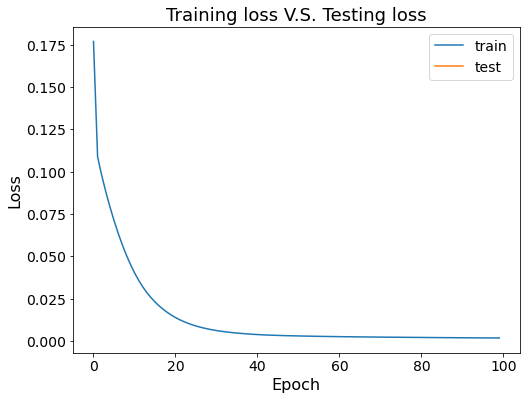

In [35]:
lr = 0.00001
EPOCHS = 100
model.compile(
              optimizer=Adam(learning_rate=lr, decay=lr/EPOCHS),
#               optimizer='adam',
              loss='mse',
              metrics=['mae'])
history = model.fit(train_X, train_y,
                    batch_size=256,
                    epochs=EPOCHS,
                    validation_data=(test_X, test_y),
                    verbose=2,
                    shuffle=False)

plt.rcParams["figure.figsize"] = (8, 6)
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='test')
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.xlabel('Epoch', fontsize=16)
plt.ylabel('Loss', fontsize=16)
plt.legend(fontsize=14)
plt.title("Training loss V.S. Testing loss", fontsize=18)
# plt.savefig('graph/rnn_loss.png', dpi=300)
plt.show()

### Prediction

In [36]:
yhat = model.predict(test_X)
inv_yhat = scaler.inverse_transform(yhat)
inv_y = scaler.inverse_transform(test_y)

inv_yhat = pd.DataFrame(inv_yhat)
inv_y = pd.DataFrame(inv_y)
print("inv_y.shape, inv_yhat.shape", inv_y.shape, inv_yhat.shape)

inv_y.shape, inv_yhat.shape (115564, 5) (115564, 5)


### Performance

In [38]:
# # Whole test set: WS = ['WS_S1', 'WS_S4', 'TWS_S25A', 'TWS_S25B', 'TWS_S26']
# RMSES, MAES = [], []
# for i in range(inv_yhat.shape[1]):
#     RMSE = sqrt(mean_squared_error(inv_y.iloc[:, i], inv_yhat.iloc[:, i]))
#     MAE = mean_absolute_error(inv_y.iloc[:, i], inv_yhat.iloc[:, i])
#     RMSES.append(float("{:.4f}".format(RMSE)))
#     MAES.append(float("{:.4f}".format(MAE)))
# print("Test RMSE for WS_S1, WS_S4, TWS_S25A, TWS_S25B, TWS_S26:", RMSES)
# print("Test MAE for WS_S1, WS_S4, TWS_S25A, TWS_S25B, TWS_S26:", MAES)

In [ ]:
# # 'WS_S1', 'WS_S4', 'TWS_S25A', 'TWS_S25B', 'TWS_S26', 'HWS_S25A', 'HWS_S25B', 'HWS_S26'
plt.rcParams["figure.figsize"] = (8, 6)
plt.title('Comparison RMSE & MAE at Different Locations', fontsize=18)
plt.plot(RMSES, label='RMSE', marker='D')
plt.plot(MAES, label='MAE', marker='o')
plt.xlabel('Locations', fontsize=16)
plt.ylabel('Error', fontsize=16)
plt.xticks(np.arange(5), ['S1', 'S4', 'S25A', 'S25B', 'S26'], fontsize=14)
plt.yticks(fontsize=14)
# plt.axhline(y=0.15, color='red', linestyle='-', linewidth=2)
# plt.axhline(y=0.25, color='orange', linestyle='-', linewidth=2)
# plt.text(0, 0.26, 'R=0.25', fontsize=14)
# plt.text(0, 0.16, 'R=0.15', fontsize=14)
plt.legend(fontsize=14)
plt.show()


date = ['09/10', '09/11', '09/12', '09/13', '09/14', '09/15', '09/16']
# # 'WS_S1', 'WS_S4', 'TWS_S25A', 'TWS_S25B', 'TWS_S26', 'HWS_S25A', 'HWS_S25B', 'HWS_S26'  [99635:100499, 0]
RMSE_WS_S1 = sqrt(mean_squared_error(inv_y.iloc[99635:100499, 0], inv_yhat.iloc[99635:100499, 0]))
MAE_WS_S1 = mean_absolute_error(inv_y.iloc[99635:100499, 0], inv_yhat.iloc[99635:100499, 0])
plt.rcParams["figure.figsize"] = (8, 6)

plt.plot(inv_yhat.iloc[99635:100499, 0], label='prediction', linewidth=2)
plt.plot(inv_y.iloc[99635:100499, 0], label='truth', linewidth=2)
plt.title('Predicted & Actual Value of WS_S1', fontsize=18)
plt.text(99858, 3.35, 'MAE: {:.4f}'.format(MAE_WS_S1), fontsize=13)
plt.xlabel('Time', fontsize=16)
plt.ylabel('Water Stage', fontsize=16)
plt.xticks(np.arange(99635, 100500, 144), date, fontsize=14)
plt.yticks(fontsize=14)
plt.legend(fontsize=13, loc='upper left')
plt.show()
plt.close()

# # 'WS_S1', 'WS_S4', 'TWS_S25A', 'TWS_S25B', 'TWS_S26', 'HWS_S25A', 'HWS_S25B', 'HWS_S26'
RMSE_WS_S4 = sqrt(mean_squared_error(inv_y.iloc[99635:100499, 1], inv_yhat.iloc[99635:100499, 1]))
MAE_WS_S4 = mean_absolute_error(inv_y.iloc[99635:100499, 1], inv_yhat.iloc[99635:100499, 1])
plt.rcParams["figure.figsize"] = (8, 6)
plt.plot(inv_yhat.iloc[99635:100499, 1], label='prediction', linewidth=2)
plt.plot(inv_y.iloc[99635:100499, 1], label='truth', linewidth=2)
plt.title('Predicted & Actual Value of WS_S4', fontsize=18)
plt.text(99858, 3.3, 'MAE: {:.4f}'.format(MAE_WS_S4), fontsize=13)
plt.xlabel('Time', fontsize=16)
plt.ylabel('Water Stage', fontsize=16)
plt.xticks(np.arange(99635, 100500, 144), date, fontsize=14)
plt.yticks(fontsize=14)
plt.legend(fontsize=13, loc='upper left')
plt.show()
plt.close()

# # 'WS_S1', 'WS_S4', 'TWS_S25A', 'TWS_S25B', 'TWS_S26', 'HWS_S25A', 'HWS_S25B', 'HWS_S26'
RMSE_TWS_S25A = sqrt(mean_squared_error(inv_y.iloc[99635:100499, 2], inv_yhat.iloc[99635:100499, 2]))
MAE_TWS_S25A = mean_absolute_error(inv_y.iloc[99635:100499, 2], inv_yhat.iloc[99635:100499, 2])
plt.rcParams["figure.figsize"] = (8, 6)
plt.plot(inv_yhat.iloc[99635:100499, 2], label='prediction', linewidth=2)
plt.plot(inv_y.iloc[99635:100499, 2], label='truth', linewidth=2)
plt.title('Predicted & Actual Value of TWS_S25A', fontsize=18)
plt.text(99858, 3.35, 'MAE: {:.4f}'.format(MAE_TWS_S25A), fontsize=13)
plt.xlabel('Time', fontsize=16)
plt.ylabel('Water Stage', fontsize=16)
plt.xticks(np.arange(99635, 100500, 144), date, fontsize=14)
plt.yticks(fontsize=14)
plt.legend(fontsize=13, loc='upper left')
plt.show()
plt.close()

# # 'WS_S1', 'WS_S4', 'TWS_S25A', 'TWS_S25B', 'TWS_S26', 'HWS_S25A', 'HWS_S25B', 'HWS_S26'
RMSE_TWS_S25B = sqrt(mean_squared_error(inv_y.iloc[99635:100499, 3], inv_yhat.iloc[99635:100499, 3]))
MAE_TWS_S25B = mean_absolute_error(inv_y.iloc[99635:100499, 3], inv_yhat.iloc[99635:100499, 3])
plt.rcParams["figure.figsize"] = (8, 6)
plt.plot(inv_yhat.iloc[99635:100499, 3], label='prediction', linewidth=2)
plt.plot(inv_y.iloc[99635:100499, 3], label='truth', linewidth=2)
plt.title('Predicted & Actual Value of TWS_S25B', fontsize=18)
plt.text(99858, 3.35, 'MAE: {:.4f}'.format(MAE_TWS_S25B), fontsize=13)
plt.xlabel('Time', fontsize=16)
plt.ylabel('Water Stage', fontsize=16)
plt.xticks(np.arange(99635, 100500, 144), date, fontsize=14)
plt.yticks(fontsize=14)
plt.legend(fontsize=13, loc='upper left')
plt.show()
plt.close()

# # 'WS_S1', 'WS_S4', 'TWS_S25A', 'TWS_S25B', 'TWS_S26', 'HWS_S25A', 'HWS_S25B', 'HWS_S26'
RMSE_TWS_S26 = sqrt(mean_squared_error(inv_y.iloc[99635:100499, 4], inv_yhat.iloc[99635:100499, 4]))
MAE_TWS_S26 = mean_absolute_error(inv_y.iloc[99635:100499, 4], inv_yhat.iloc[99635:100499, 4])
plt.rcParams["figure.figsize"] = (8, 6)
plt.plot(inv_yhat.iloc[99635:100499, 4], label='prediction', linewidth=2)
plt.plot(inv_y.iloc[99635:100499, 4], label='truth', linewidth=2)
plt.title('Predicted & Actual Value of TWS_S26', fontsize=18)
plt.text(99858, 3.35, 'MAE: {:.4f}'.format(MAE_TWS_S26), fontsize=13)
plt.xlabel('Time', fontsize=16)
plt.ylabel('Water Stage', fontsize=16)
plt.xticks(np.arange(99635, 100500, 144), date, fontsize=14)
plt.yticks(fontsize=14)
plt.legend(fontsize=13, loc='upper left')
plt.show()
plt.close()

In [153]:
dataset['date'] = pd.to_datetime(dataset['Time']).dt.date
dataset

,Time,WS_S1,WS_S4,FLOW_S25A,GATE_S25A,HWS_S25A,TWS_S25A,FLOW_S25B,GATE_S25B,HWS_S25B,...,10040720,10040721,10040722,10040723,10040246,10040247,10040248,10040249,mean,date
0,1/1/10 00:00,0.33,0.34,0.0,0.0,2.17,0.49,0.00,0.0,2.84,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2010-01-01
1,1/1/10 00:10,0.24,0.24,0.0,0.0,2.17,0.49,0.00,0.0,2.84,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2010-01-01
2,1/1/10 00:20,0.15,0.12,0.0,0.0,2.17,0.40,0.00,0.0,2.84,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2010-01-01
3,1/1/10 00:30,0.03,0.02,0.0,0.0,2.17,0.30,0.00,0.0,2.84,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2010-01-01
4,1/1/10 00:40,-0.05,-0.06,0.0,0.0,2.17,0.20,0.00,0.0,2.84,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2010-01-01
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
578443,12/30/20 23:10,1.59,1.47,0.0,0.0,1.92,1.58,307.56,0.0,2.52,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2020-12-30
578444,12/30/20 23:20,1.50,1.40,0.0,0.0,1.93,1.54,325.26,0.0,2.50,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2020-12-30
578445,12/30/20 23:30,1.43,1.33,0.0,0.0,1.92,1.44,339.04,0.0,2.50,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2020-12-30
578446,12/30/20 23:40,1.38,1.25,0.0,0.0,1.93,1.39,348.63,0.0,2.50,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2020-12-30


In [133]:
dataset.iloc[:, -30:]

,10042142,10042143,10042144,10042145,10041665,10041666,10041667,10041668,10041669,10041670,...,10040719,10040720,10040721,10040722,10040723,10040246,10040247,10040248,10040249,mean
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
578443,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
578444,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
578445,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
578446,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [154]:
print(dataset.iloc[:, 18:49].mean())

10042141    0.001751
10042142    0.001768
10042143    0.001646
10042144    0.001657
10042145    0.001574
10041665    0.001705
10041666    0.001669
10041667    0.001830
10041668    0.001806
10041669    0.001683
10041670    0.001584
10041671    0.001446
10041191    0.001693
10041192    0.001638
10041193    0.001689
10041194    0.001717
10041195    0.001596
10041196    0.001471
10041197    0.001364
10040717    0.001666
10040718    0.001555
10040719    0.001598
10040720    0.001536
10040721    0.001470
10040722    0.001433
10040723    0.001422
10040246    0.001422
10040247    0.001454
10040248    0.001439
10040249    0.001507
mean        0.001602
dtype: float64


In [134]:
# temp = dataset.iloc[:, -30]
# temp.max()
dataset

1.34

In [39]:
data = dataset.iloc[:, -2:]
data

,mean,date
0,0.0,2010-01-01
1,0.0,2010-01-01
2,0.0,2010-01-01
3,0.0,2010-01-01
4,0.0,2010-01-01
...,...,...
578443,0.0,2020-12-30
578444,0.0,2020-12-30
578445,0.0,2020-12-30
578446,0.0,2020-12-30


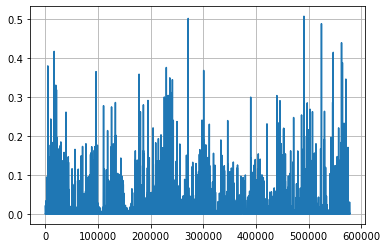

In [50]:
plt.plot(data.loc[:, 'mean'])
plt.grid()

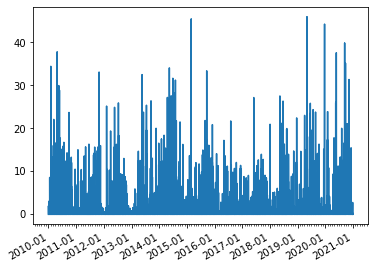

In [105]:
import matplotlib.dates as mdates
fig, ax = plt.subplots(1, 1) # figsize=(18, 16), constrained_layout=True
ax.plot('date', 'mean_normalized', data=data)
ax.xaxis.set_major_locator(mdates.MonthLocator(bymonth=(1, 1)))
ax.xaxis.set_minor_locator(mdates.MonthLocator())
for label in ax.get_xticklabels(which='major'):
    label.set(rotation=30, horizontalalignment='right')

In [135]:
print(dataset.columns)

Index(['Time', 'WS_S1', 'WS_S4', 'FLOW_S25A', 'GATE_S25A', 'HWS_S25A',
       'TWS_S25A', 'FLOW_S25B', 'GATE_S25B', 'HWS_S25B', 'TWS_S25B',
       'FLOW_S26', 'GATE_S26', 'HWS_S26', 'TWS_S26', 'RAIN_S26', '10042139',
       '10042140', '10042141', '10042142', '10042143', '10042144', '10042145',
       '10041665', '10041666', '10041667', '10041668', '10041669', '10041670',
       '10041671', '10041191', '10041192', '10041193', '10041194', '10041195',
       '10041196', '10041197', '10040717', '10040718', '10040719', '10040720',
       '10040721', '10040722', '10040723', '10040246', '10040247', '10040248',
       '10040249', 'mean'],
      dtype='object')


In [147]:
rain = dataset.iloc[:, 18:43]
rain

,10042141,10042142,10042143,10042144,10042145,10041665,10041666,10041667,10041668,10041669,...,10041194,10041195,10041196,10041197,10040717,10040718,10040719,10040720,10040721,10040722
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
578443,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
578444,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
578445,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
578446,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [150]:
# print(rain.mean())
print(rain.max())
# print(data['mean'].std())

10042141    1.35
10042142    1.34
10042143    1.29
10042144    1.15
10042145    1.37
10041665    1.19
10041666    1.27
10041667    1.21
10041668    1.24
10041669    1.47
10041670    1.27
10041671    1.60
10041191    1.45
10041192    1.50
10041193    1.24
10041194    1.37
10041195    1.58
10041196    1.40
10041197    1.38
10040717    1.40
10040718    1.16
10040719    1.37
10040720    1.25
10040721    1.38
10040722    1.33
dtype: float64


In [40]:
column = 'mean'
data['mean_normalized'] = (data[column] - data[column].mean()) / data[column].std()

In [41]:
data

,mean,date,mean_normalized
0,0.0,2010-01-01,-0.146111
1,0.0,2010-01-01,-0.146111
2,0.0,2010-01-01,-0.146111
3,0.0,2010-01-01,-0.146111
4,0.0,2010-01-01,-0.146111
...,...,...,...
578443,0.0,2020-12-30,-0.146111
578444,0.0,2020-12-30,-0.146111
578445,0.0,2020-12-30,-0.146111
578446,0.0,2020-12-30,-0.146111


In [117]:
data.describe()

,mean,mean_normalized
count,578448.000000,5.784480e+05
mean,0.001602,-3.563737e-14
std,0.010961,1.000000e+00
min,0.000000,-1.461114e-01
25%,0.000000,-1.461114e-01
50%,0.000000,-1.461114e-01
75%,0.000000,-1.461114e-01
max,0.506250,4.603836e+01


In [111]:
print(data['mean_normalized'].min())
print(data['mean_normalized'].max())

-0.14611137235513952
46.03835558705629


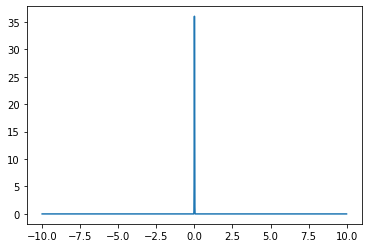

In [122]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm
import statistics
  
# Plot between -10 and 10 with .001 steps.
x_axis = np.arange(-10, 10, 0.01)
  
# Calculating mean and standard deviation
mean = 0.0016015965350384123
std = 0.010961477599057507
  
plt.plot(x_axis, norm.pdf(x_axis, mean, std))
plt.show()

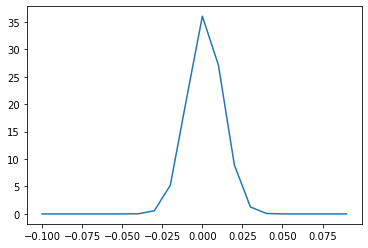

In [155]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm
import statistics
  
# Plot between -10 and 10 with .001 steps.
x_axis = np.arange(-0.1, 0.1, 0.01)
  
# Calculating mean and standard deviation
mean = 0.0016015965350384123
std = 0.010961477599057507
  
plt.plot(x_axis, norm.pdf(x_axis, mean, std))
plt.show()

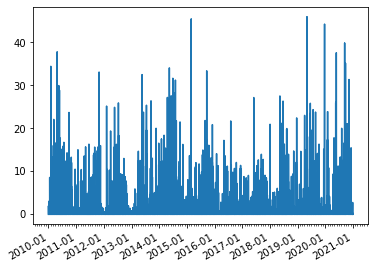

In [64]:
import matplotlib.dates as mdates
fig, ax = plt.subplots(1, 1) # figsize=(18, 16), constrained_layout=True
ax.plot('date', 'mean_normalized', data=data)
ax.xaxis.set_major_locator(mdates.MonthLocator(bymonth=(1, 1)))
ax.xaxis.set_minor_locator(mdates.MonthLocator())
for label in ax.get_xticklabels(which='major'):
    label.set(rotation=30, horizontalalignment='right')

In [95]:
# import pandas as pd
# import numpy as np
 
# #Create a DataFrame
# d = {
#     'Name':['Alisa','Bobby','Cathrine','Madonna','Rocky','Sebastian','Jaqluine',
#    'Rahul','David','Andrew','Ajay','Teresa'],
# #    'Score1':[62,47,55,74,31,77,85,63,42,32,71,57],
# #    'Score2':[89,87,67,55,47,72,76,79,44,92,99,69],
#    'Score3':[56,86,77,45,73,62,74,89,71,67,97,68]}

# df = pd.DataFrame(d)
# df

In [96]:
# std = df.std()
# print(std)

# mean = df.mean()
# print(mean)

In [81]:
# # column = 'Score3'
# df['Score3_norm'] = (df[column] - df[column].mean()) / df[column].std()

In [94]:
# df

In [93]:
# plt.plot(df['Score3_norm'])

In [88]:
np.random.seed([3,1415])
df = pd.DataFrame(dict(
        Name='matt joe adam farley'.split() * 100,
        Seconds=np.random.randint(4000, 5000, 400)
    ))

df

,Name,Seconds
0,matt,4752
1,joe,4011
2,adam,4098
3,farley,4891
4,matt,4714
...,...,...
395,farley,4476
396,matt,4240
397,joe,4720
398,adam,4955


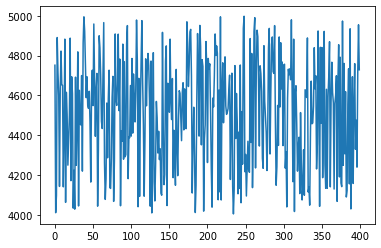

In [97]:
plt.plot(df['Seconds'])

In [90]:
df['Zscore'] = df.groupby('Name').Seconds.apply(lambda x: x.div(x.mean()))
df

,Name,Seconds,Zscore
0,matt,4752,1.054723
1,joe,4011,0.887168
2,adam,4098,0.911005
3,farley,4891,1.080791
4,matt,4714,1.046288
...,...,...,...
395,farley,4476,0.989086
396,matt,4240,0.941082
397,joe,4720,1.043987
398,adam,4955,1.101520


Name
adam      AxesSubplot(0.125,0.125;0.775x0.755)
farley    AxesSubplot(0.125,0.125;0.775x0.755)
joe       AxesSubplot(0.125,0.125;0.775x0.755)
matt      AxesSubplot(0.125,0.125;0.775x0.755)
Name: Zscore, dtype: object

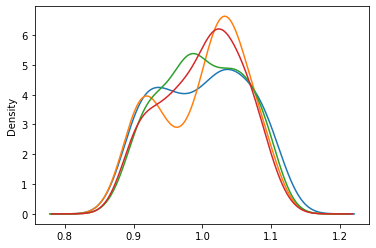

In [91]:
df.groupby('Name').Zscore.plot.kde()

In [92]:
data

,mean,date,mean_normalized
0,0.0,2010-01-01,-0.146111
1,0.0,2010-01-01,-0.146111
2,0.0,2010-01-01,-0.146111
3,0.0,2010-01-01,-0.146111
4,0.0,2010-01-01,-0.146111
...,...,...,...
578443,0.0,2020-12-30,-0.146111
578444,0.0,2020-12-30,-0.146111
578445,0.0,2020-12-30,-0.146111
578446,0.0,2020-12-30,-0.146111


In [ ]:
data['Zscore'] = data.groupby('Name').Seconds.apply(lambda x: x.div(x.mean()))